In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
# função para traçar reta
def coord(w0,w1,w2,x1):
  if w2 != 0:
    return (-w0-w1*x1)/w2
  else:
    return 2000 # Inf

In [4]:
# Dataset porta lógica AND
X = np.array([[-1,-1],[-1,1],[1,-1],[1,1]])
y = np.array([-1,-1,-1,1])

In [5]:
# confere entrada - saída
X[0:4], y[0:4]

(array([[-1, -1],
        [-1,  1],
        [ 1, -1],
        [ 1,  1]]),
 array([-1, -1, -1,  1]))

In [6]:
# base
# classe Perceptron

class Perceptron(object):

    def __init__(self, eta=0.1, epocas=50):
        self.eta = eta
        self.epocas = epocas
        self.w_ = np.random.rand(1 + X.shape[1]) - 0.5

    def treina(self, X, y):
        self.erros_ = []
        for _ in range(self.epocas):
            erros = 0
            for xi, target in zip(X, y):

                # atualizacao PERCEPTRON classico
                # atualiza = self.eta * (target - self.predict(xi))

                # atualizacao abordagem ADALINE
                atualiza = self.eta * (target - self.somat(xi))

                self.w_[0] +=  atualiza * 1
                self.w_[1:] +=  atualiza * xi

                # erros PERCEPTRON
                # erros += int(atualiza != 0.0)

                # erros ADALINE
                erros += (target - self.somat(xi))

            self.erros_.append(erros)
        return self

    def somat(self, X):
        return self.w_[0] + np.dot(X, self.w_[1:])

    def predict(self, X):
        return np.where(self.somat(X) >= 0.0, 1, -1)

In [7]:
rna = Perceptron(epocas=100, eta=0.1)

Pesos iniciais: [ 0.18621538 -0.12455006 -0.15629783]


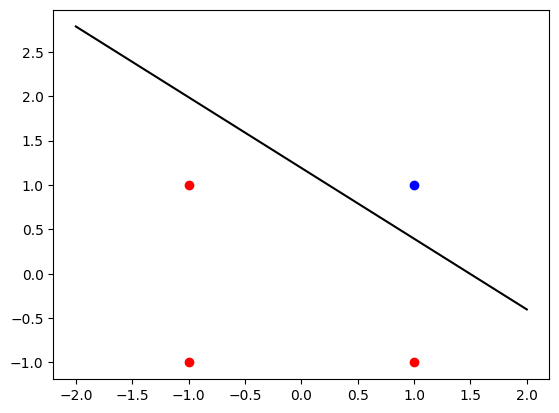

In [8]:
print(f'Pesos iniciais: {rna.w_}')
x1, y1 = X[y==1,0],X[y==1,1]
x0, y0 = X[y==-1,0], X[y==-1,1]

ylim = [min(min(x1) , min(x0))-1, max(max(x0) , max(x1))+1]
x = np.linspace(ylim[0], ylim[1], 2)
plt.scatter(x1,y1, color='blue')
plt.scatter(x0,y0,color='red')
plt.plot(ylim,coord(rna.w_[0],rna.w_[1],rna.w_[2], x),color='black')
plt.show()

In [9]:
rna.treina(X, y)

In [10]:
print(f'Pesos depois treinamento: {rna.w_}')

Pesos depois treinamento: [-0.5         0.52941176  0.55882353]


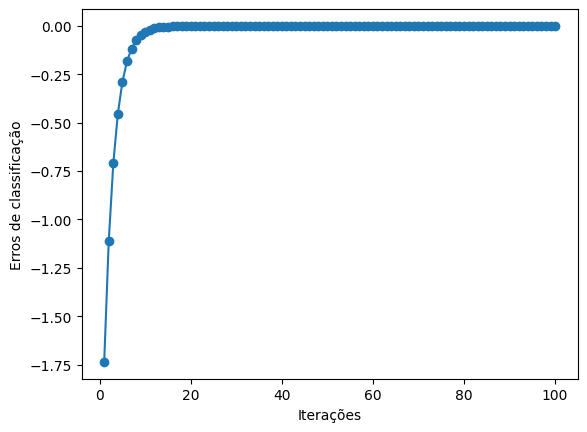

In [11]:
# evolução do erro
plt.plot(range(1, len(rna.erros_)+1), rna.erros_, marker='o')
plt.xlabel('Iterações')
plt.ylabel('Erros de classificação')
plt.show()

Pesos depois treinamento [w0, w1,w2]: [-0.5         0.52941176  0.55882353]


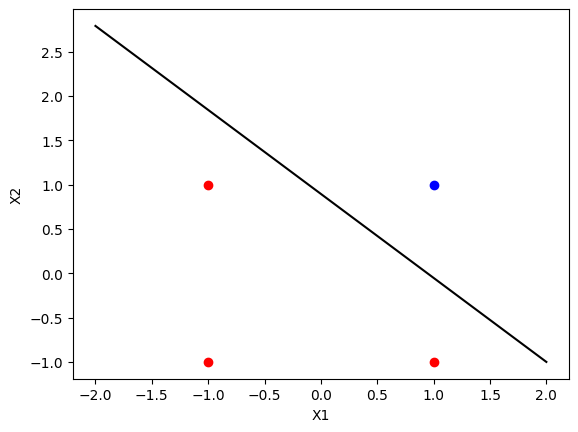

In [12]:
print(f'Pesos depois treinamento [w0, w1,w2]: {rna.w_}')
x1, y1 = X[y==1,0],X[y==1,1]
x0, y0 = X[y==-1,0], X[y==-1,1]

ylim = [min(min(x1) , min(x0))-1, max(max(x0) , max(x1))+1]
x = np.linspace(ylim[0], ylim[1], 2)
plt.scatter(x1,y1, color='blue')
plt.scatter(x0,y0,color='red')
plt.plot(ylim,coord(rna.w_[0],rna.w_[1],rna.w_[2], x),color='black')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [13]:
rna.erros_

[-1.7366663183002902,
 -1.1114360658705698,
 -0.7102544890008267,
 -0.45324915005269895,
 -0.28885668907240236,
 -0.18385539165790665,
 -0.11688059655787097,
 -0.07421675431496089,
 -0.0470732720836321,
 -0.029824786175330242,
 -0.018876733584358818,
 -0.01193541443914592,
 -0.00753915368587077,
 -0.004757668950241101,
 -0.00299960023653445,
 -0.0018894703551514125,
 -0.001189141169941954,
 -0.0007477417182020218,
 -0.0004697882096780237,
 -0.00029491144185456175,
 -0.00018498058556892794,
 -0.00011593406216992008,
 -7.260241603990192e-05,
 -4.543079790519933e-05,
 -2.8406159478189252e-05,
 -1.77476395214482e-05,
 -1.1079933037838607e-05,
 -6.912006917048075e-06,
 -4.308669925401354e-06,
 -2.6838323159417143e-06,
 -1.6704797056732446e-06,
 -1.0389647472353047e-06,
 -6.457045370611425e-07,
 -4.009954491790424e-07,
 -2.4883777571815813e-07,
 -1.542988293801173e-07,
 -9.560400926478252e-08,
 -5.919075873883628e-08,
 -3.661783809505437e-08,
 -2.2635421093042396e-08,
 -1.3980962609849712e-0